In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy . optimize import leastsq
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
# read sheets
# 0-stock return, 1-all issuers, 2-first-issued, 3-subsequent, 4-noncertification, 5-certification, 6-score>mean, 7-score<mean
CGB = pd.read_excel('/workspaces/Dissertation1/Haiyan - Chinese Corporate Bond Data.xlsx', sheet_name=[0,1,2,3,4,5,6,7])


In [3]:

def error(params, x, y):
    a, b = params
    return y - (a * x + b)


In [6]:
CGB = pd.read_excel('/workspaces/Dissertation1/3Haiyan - Chinese Corporate Bond Data.xlsx', sheet_name=[0,1,2,3,4,5,6,7])
# robustness test
# event window
ewl=-5
ewr=5

Total_AR1= np.zeros((len(CGB[1]['Code']),ewr - ewl + 1))
# Total_CAR11 = []
for i in range(len(CGB[1]['Code'])):
    row_num_x = list(CGB[0]['Code']).index(CGB[1]['Start Date'][i])
    x = CGB[0][['CHSASHR','smb','hml','rmw','cma']][row_num_x - 220: row_num_x - 19]
    # x2 = CGB[0]['smb'][row_num_x - 220: row_num_x - 19]
    # x3 = CGB[0]['hml'][row_num_x - 220: row_num_x - 19]
    y = CGB[0][CGB[1]['Code'][i]][row_num_x - 220: row_num_x - 19]
    result = sm.OLS(y, sm.add_constant(x)).fit()
    # print(result.params)
    print(result.summary())
    # print(a,b)


    
#     for j in range(ewr - ewl + 1):
#         # the abnormal daily return 
#         AR1 = CGB[0][CGB[1]['Code'][i]][row_num_x + ewl + j] - (result.params['const'] + result.params['CHSASHR'] * CGB[0]['CHSASHR'][row_num_x + ewl + j] + result.params['smb']*CGB[0]['smb'][row_num_x + ewl + j] + result.params['hml']*CGB[0]['hml'][row_num_x + ewl + j] + result.params['rmw']*CGB[0]['rmw'][row_num_x + ewl + j] + result.params['cma']*CGB[0]['cma'][row_num_x + ewl + j])
#         Total_AR1[i][j]=AR1
#     # print(np.max(Total_AR1)) 
#     # print(np.min(Total_AR1)) 

# # the cumulative abnormal return of company i
# Total_CAR1=np.sum(Total_AR1, axis=1)
# # the average abnormal return in [ewl,ewr]
# Total_CAR11=np.mean(Total_AR1, axis=0)
# # print(Total_CAR1)
# # print(Total_CAR11)

# # Issuance Number - CAR figure
# Company_numbers=range(len(CGB[1]['Code']))
# plt.figure(figsize=(10, 5))
# plt.bar(Company_numbers, Total_CAR1, color='black')

# plt.xlabel('Green Bond Numbers')
# plt.ylabel('CAR(%)')
# plt.show()

# # Event Window - CAR figure
# Event_number=np.arange(ewl, ewr+1, 1)
# plt.figure(figsize=(10, 5))
# plt.bar(Event_number, Total_CAR11, color='black')
# plt.xticks(Event_number)
# plt.xlabel('Event Window')
# plt.ylabel('AAR(%)')
# plt.show()

# CAAR1 = np.mean(Total_CAR1)
# print(CAAR1)
# # T-test
# t_statistic, p_value = stats.ttest_1samp(Total_CAR1, 0)

# print(f"T-statistic: {t_statistic}, P-value: {p_value}")


                            OLS Regression Results                            
Dep. Variable:                 50480Q   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     31.34
Date:                Sun, 18 Aug 2024   Prob (F-statistic):           2.38e-23
Time:                        17:43:11   Log-Likelihood:                -482.28
No. Observations:                 201   AIC:                             976.6
Df Residuals:                     195   BIC:                             996.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1858      0.193      0.965      0.3

                            OLS Regression Results                            
Dep. Variable:                 90632E   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     10.65
Date:                Sun, 18 Aug 2024   Prob (F-statistic):           4.62e-09
Time:                        17:43:11   Log-Likelihood:                -435.82
No. Observations:                 201   AIC:                             883.6
Df Residuals:                     195   BIC:                             903.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0828      0.156     -0.532      0.5

In [8]:
# event window
ewl=-5
ewr=5

Total_AR1= np.zeros((len(CGB[1]['Code']),ewr - ewl + 1))
# Total_CAR11 = []
for i in range(len(CGB[1]['Code'])):
    row_num_x = list(CGB[0]['Code']).index(CGB[1]['Start Date'][i])
    x = CGB[0]['CHSASHR'][row_num_x - 220: row_num_x - 19]
    y = CGB[0][CGB[1]['Code'][i]][row_num_x - 220: row_num_x - 19]
    p0 = [0, 1]
    Para = leastsq(error, p0, args=(x, y))
    a, b = Para[0]
    # print(a,b)


    
    for j in range(ewr - ewl + 1):
        # the abnormal daily return 
        AR1 = CGB[0][CGB[1]['Code'][i]][row_num_x + ewl + j] - (b + a * CGB[0]['CHSASHR'][row_num_x + ewl + j])
        Total_AR1[i][j]=AR1
        

# the cumulative abnormal return of company i
Total_CAR1=np.sum(Total_AR1, axis=1)
# the average abnormal return in [ewl,ewr]
Total_CAR11=np.mean(Total_AR1, axis=0)
# print(Total_CAR1)
# print(Total_CAR11)



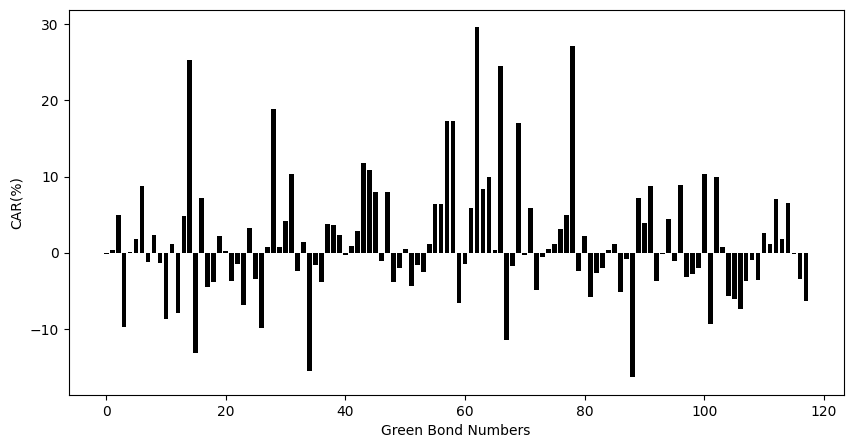

In [9]:
# Issuance Number - CAR figure
Company_numbers=range(len(CGB[1]['Code']))
plt.figure(figsize=(10, 5))
plt.bar(Company_numbers, Total_CAR1, color='black')

plt.xlabel('Green Bond Numbers')
plt.ylabel('CAR(%)')

plt.show()


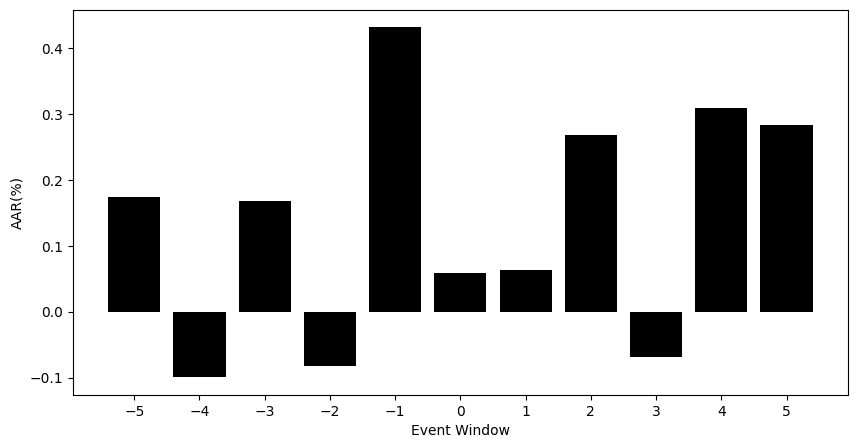

In [10]:
# Event Window - CAR figure
Event_number=np.arange(ewl, ewr+1, 1)
plt.figure(figsize=(10, 5))
plt.bar(Event_number, Total_CAR11, color='black')
plt.xticks(Event_number)
plt.xlabel('Event Window')
plt.ylabel('AAR(%)')

plt.show()

In [11]:
CAAR1 = np.mean(Total_CAR1)
print(CAAR1)
# T-test
t_statistic, p_value = stats.ttest_1samp(Total_CAR1, 0)

print(f"T-statistic: {t_statistic}, P-value: {p_value}")

1.505674872524326
T-statistic: 2.06994181844691, P-value: 0.04065881848548986


<h1>Robustness Tests<h1>

In [8]:
#  change event window
# ewl=-3
# ewr=5

# ewl=-1
# ewr=5

ewl=-1
ewr=2

Total_AR1= np.zeros((len(CGB[1]['Code']),ewr - ewl + 1))
for i in range(len(CGB[1]['Code'])):
    row_num_x = list(CGB[0]['Code']).index(CGB[1]['Start Date'][i])
    x = CGB[0]['CHSASHR'][row_num_x - 220: row_num_x - 19]
    y = CGB[0][CGB[1]['Code'][i]][row_num_x - 220: row_num_x - 19]
    p0 = [0, 1]
    Para = leastsq(error, p0, args=(x, y))
    a, b = Para[0]
    # print(a,b)

    
    for j in range(ewr - ewl + 1):
        # the abnormal daily return 
        AR1 = CGB[0][CGB[1]['Code'][i]][row_num_x + ewl + j] - (b + a * CGB[0]['CHSASHR'][row_num_x + ewl + j])
        # the cumulative abnormal return
        Total_AR1[i][j]=AR1

# the cumulative abnormal return of company i
Total_CAR1=np.sum(Total_AR1, axis=1)
# the average abnormal return in [ewl,ewr]
Total_CAR11=np.mean(Total_AR1, axis=0)
# print(Total_CAR1)
# print(Total_CAR11)

CAAR1 = np.mean(Total_CAR1)
print(CAAR1)
# T-test
t_statistic, p_value = stats.ttest_1samp(Total_CAR1, 0)

print(f"T-statistic: {t_statistic}, P-value: {p_value}")


0.8216295525020232
T-statistic: 2.222231971328996, P-value: 0.028190412155469368


<h1>Heterogeneity Tests<h1>

<h1>first issuer and subsequence issuer<h1>

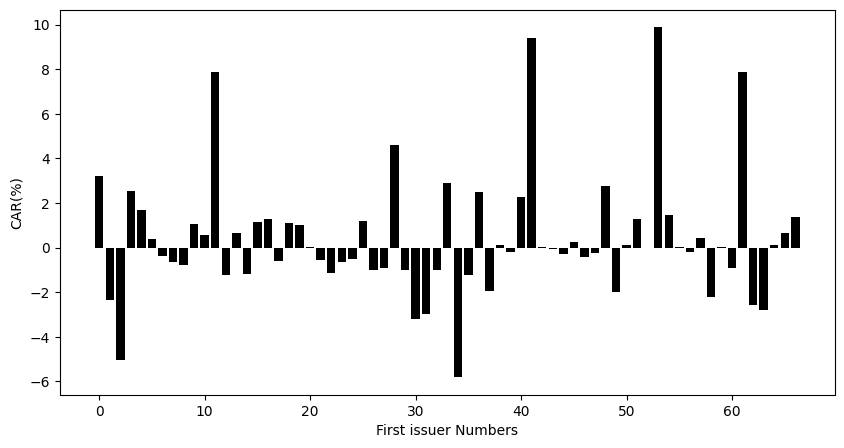

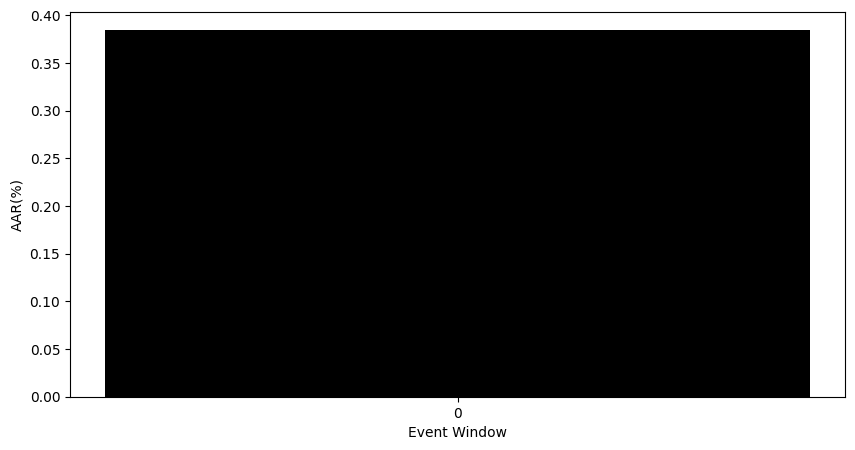

0.3846560244076288
T-statistic: 1.1361187431138438, P-value: 0.2600154632925812


In [4]:
# first issued

# event window
# ewl=-5
# ewr=5

# ewl=-3
# ewr=5

# ewl=-1
# ewr=5

# ewl=-1
# ewr=2

# ewl=-1
# ewr=0

ewl=0
ewr=0

Total_AR2= np.zeros((len(CGB[2]['Code']),ewr - ewl + 1))
for i in range(len(CGB[2]['Code'])):
    row_num_x = list(CGB[0]['Code']).index(CGB[2]['Start Date'][i])
    x = CGB[0]['CHSASHR'][row_num_x - 220: row_num_x - 19]
    y = CGB[0][CGB[2]['Code'][i]][row_num_x - 220: row_num_x - 19]
    p0 = [0, 1]
    Para = leastsq(error, p0, args=(x, y))
    a, b = Para[0]
    # print(a,b)

   
 
    for j in range(ewr - ewl + 1):
        # the abnormal daily return 
        AR2 = CGB[0][CGB[2]['Code'][i]][row_num_x + ewl + j] - (b + a * CGB[0]['CHSASHR'][row_num_x + ewl + j])
        Total_AR2[i][j]=AR2


# the cumulative abnormal return of company i
Total_CAR2=np.sum(Total_AR2, axis=1)
# the average abnormal return in [ewl,ewr]
Total_CAR22=np.mean(Total_AR2, axis=0)
# print(Total_CAR2)
# print(Total_CAR22)

# Issuance Number - CAR figure
Company_numbers=range(len(CGB[2]['Code']))
plt.figure(figsize=(10, 5))
plt.bar(Company_numbers, Total_CAR2, color='black')

plt.xlabel('First issuer Numbers')
plt.ylabel('CAR(%)')

plt.show()
# Event Window - CAR figure
Event_number=np.arange(ewl, ewr+1, 1)
plt.figure(figsize=(10, 5))
plt.bar(Event_number, Total_CAR22, color='black')
plt.xticks(Event_number)
plt.xlabel('Event Window')
plt.ylabel('AAR(%)')

plt.show()

CAAR2 = np.mean(Total_CAR2)
print(CAAR2)
# T-test
t_statistic, p_value = stats.ttest_1samp(Total_CAR2, 0)

print(f"T-statistic: {t_statistic}, P-value: {p_value}")


In [6]:
# subsequent

# event window
# ewl=-5
# ewr=5

# ewl=-3
# ewr=5

# ewl=-1
# ewr=5

ewl=-1
ewr=2

# ewl=-1
# ewr=0


Total_AR3= np.zeros((len(CGB[3]['Code']),ewr - ewl + 1))

for i in range(len(CGB[3]['Code'])):
    row_num_x = list(CGB[0]['Code']).index(CGB[3]['Start Date'][i])
    x = CGB[0]['CHSASHR'][row_num_x - 220: row_num_x - 19]
    y = CGB[0][CGB[3]['Code'][i]][row_num_x - 220: row_num_x - 19]
    p0 = [0, 1]
    Para = leastsq(error, p0, args=(x, y))
    a, b = Para[0]
    # print(a,b)


    for j in range(ewr - ewl + 1):
        # the abnormal daily return 
        AR3 = CGB[0][CGB[3]['Code'][i]][row_num_x + ewl + j] - (b + a * CGB[0]['CHSASHR'][row_num_x + ewl + j])
        Total_AR3[i][j]=AR3


# the cumulative abnormal return of company i
Total_CAR3=np.sum(Total_AR3, axis=1)
# the average abnormal return in [ewl,ewr]
Total_CAR33=np.mean(Total_AR3, axis=0)

# print(Total_CAR33)

# Issuance Number - CAR figure
Company_numbers=range(len(CGB[3]['Code']))
plt.figure(figsize=(10, 5))
plt.bar(Company_numbers, Total_CAR3, color='black')

plt.xlabel('Subsequent issues Numbers')
plt.ylabel('CAR(%)')

plt.show()
# Event Window - CAR figure
Event_number=np.arange(ewl, ewr+1, 1)
plt.figure(figsize=(10, 5))
plt.bar(Event_number, Total_CAR33, color='black')
plt.xticks(Event_number)
plt.xlabel('Event Window')
plt.ylabel('AAR(%)')

plt.show()



CAAR3 = np.mean(Total_CAR3)
print(CAAR3)
# T-test
t_statistic, p_value = stats.ttest_1samp(Total_CAR3, 0)

print(f"T-statistic: {t_statistic}, P-value: {p_value}")

0.973571936208064
T-statistic: 1.9174970063549057, P-value: 0.06089650115854782


<h1>certification and non-certification<h1>

In [12]:
# Non-certification

# event window
# ewl=-5
# ewr=5

# ewl=-3
# ewr=5

# ewl=-1
# ewr=5

ewl=-1
ewr=2

# ewl=-1
# ewr=0


Total_AR4= np.zeros((len(CGB[4]['Code']),ewr - ewl + 1))

for i in range(len(CGB[4]['Code'])):
    row_num_x = list(CGB[0]['Code']).index(CGB[4]['Start Date'][i])
    x = CGB[0]['CHSASHR'][row_num_x - 220: row_num_x - 19]
    y = CGB[0][CGB[4]['Code'][i]][row_num_x - 220: row_num_x - 19]
    p0 = [0, 1]
    Para = leastsq(error, p0, args=(x, y))
    a, b = Para[0]
    # print(a,b)


    for j in range(ewr - ewl + 1):
        # the abnormal daily return 
        AR4 = CGB[0][CGB[4]['Code'][i]][row_num_x + ewl + j] - (b + a * CGB[0]['CHSASHR'][row_num_x + ewl + j])
        Total_AR4[i][j]=AR4


# the cumulative abnormal return of company i
Total_CAR4=np.sum(Total_AR4, axis=1)
# the average abnormal return in [ewl,ewr]
Total_CAR44=np.mean(Total_AR4, axis=0)

# print(Total_CAR33)

# # Issuance Number - CAR figure
# Company_numbers=range(len(CGB[4]['Code']))
# plt.figure(figsize=(10, 5))
# plt.bar(Company_numbers, Total_CAR4, color='black')

# plt.xlabel('Non-certification issues Numbers')
# plt.ylabel('CAR(%)')

# plt.show()
# # Event Window - CAR figure
# Event_number=np.arange(ewl, ewr+1, 1)
# plt.figure(figsize=(10, 5))
# plt.bar(Event_number, Total_CAR44, color='black')
# plt.xticks(Event_number)
# plt.xlabel('Event Window')
# plt.ylabel('AAR(%)')

# plt.show()



CAAR4 = np.mean(Total_CAR4)
print(CAAR4)
# T-test
t_statistic, p_value = stats.ttest_1samp(Total_CAR4, 0)

print(f"T-statistic: {t_statistic}, P-value: {p_value}")

0.5971217493254571
T-statistic: 1.2502830127992037, P-value: 0.21630479658850302


In [11]:
# Certification 

# event window
# ewl=-5
# ewr=5

# ewl=-3
# ewr=5

# ewl=-1
# ewr=5

ewl=-1
ewr=2



Total_AR5= np.zeros((len(CGB[5]['Code']),ewr - ewl + 1))

for i in range(len(CGB[5]['Code'])):
    row_num_x = list(CGB[0]['Code']).index(CGB[5]['Start Date'][i])
    x = CGB[0]['CHSASHR'][row_num_x - 220: row_num_x - 19]
    y = CGB[0][CGB[5]['Code'][i]][row_num_x - 220: row_num_x - 19]
    p0 = [0, 1]
    Para = leastsq(error, p0, args=(x, y))
    a, b = Para[0]
    # print(a,b)


    for j in range(ewr - ewl + 1):
        # the abnormal daily return 
        AR5 = CGB[0][CGB[5]['Code'][i]][row_num_x + ewl + j] - (b + a * CGB[0]['CHSASHR'][row_num_x + ewl + j])
        Total_AR5[i][j]=AR5


# the cumulative abnormal return of company i
Total_CAR5=np.sum(Total_AR5, axis=1)
# the average abnormal return in [ewl,ewr]
Total_CAR55=np.mean(Total_AR5, axis=0)

# print(Total_CAR55)

# # Issuance Number - CAR figure
# Company_numbers=range(len(CGB[5]['Code']))
# plt.figure(figsize=(10, 5))
# plt.bar(Company_numbers, Total_CAR5, color='black')

# plt.xlabel('Certification issues Numbers')
# plt.ylabel('CAR(%)')

# plt.show()
# # Event Window - CAR figure
# Event_number=np.arange(ewl, ewr+1, 1)
# plt.figure(figsize=(10, 5))
# plt.bar(Event_number, Total_CAR55, color='black')
# plt.xticks(Event_number)
# plt.xlabel('Event Window')
# plt.ylabel('AAR(%)')

# plt.show()



CAAR5 = np.mean(Total_CAR5)
print(CAAR5)
# T-test
t_statistic, p_value = stats.ttest_1samp(Total_CAR5, 0)

print(f"T-statistic: {t_statistic}, P-value: {p_value}")

0.9255078280384283
T-statistic: 1.5698275903595467, P-value: 0.12219104004278064


<h1>high score and low score<h1>

In [7]:
# Score>mean

# event window
# ewl=-5
# ewr=5

# ewl=-3
# ewr=5

# ewl=-1
# ewr=5

ewl=-1
ewr=2


Total_AR6= np.zeros((len(CGB[6]['Code']),ewr - ewl + 1))

for i in range(len(CGB[6]['Code'])):
    row_num_x = list(CGB[0]['Code']).index(CGB[6]['Start Date'][i])
    x = CGB[0]['CHSASHR'][row_num_x - 220: row_num_x - 19]
    y = CGB[0][CGB[6]['Code'][i]][row_num_x - 220: row_num_x - 19]
    p0 = [0, 1]
    Para = leastsq(error, p0, args=(x, y))
    a, b = Para[0]
    # print(a,b)


    for j in range(ewr - ewl + 1):
        # the abnormal daily return 
        AR6 = CGB[0][CGB[6]['Code'][i]][row_num_x + ewl + j] - (b + a * CGB[0]['CHSASHR'][row_num_x + ewl + j])
        Total_AR6[i][j]=AR6


# the cumulative abnormal return of company i
Total_CAR6=np.sum(Total_AR6, axis=1)
# the average abnormal return in [ewl,ewr]
Total_CAR66=np.mean(Total_AR6, axis=0)

# print(Total_CAR66)

# # Issuance Number - CAR figure
# Company_numbers=range(len(CGB[6]['Code']))
# plt.figure(figsize=(10, 5))
# plt.bar(Company_numbers, Total_CAR6, color='black')

# plt.xlabel('Score>mean issues Numbers')
# plt.ylabel('CAR(%)')
# plt.show()

# # Event Window - CAR figure
# Event_number=np.arange(ewl, ewr+1, 1)
# plt.figure(figsize=(10, 5))
# plt.bar(Event_number, Total_CAR66, color='black')
# plt.xticks(Event_number)
# plt.xlabel('Event Window')
# plt.ylabel('AAR(%)')
# plt.show()

CAAR6 = np.mean(Total_CAR6)
print(CAAR6)
# T-test
t_statistic, p_value = stats.ttest_1samp(Total_CAR6, 0)

print(f"T-statistic: {t_statistic}, P-value: {p_value}")

1.087336999568988
T-statistic: 2.055735463196752, P-value: 0.04550926211738009


In [11]:
# Score<mean

# event window
# ewl=-5
# ewr=5

# ewl=-3
# ewr=5

# ewl=-1
# ewr=5

ewl=-1
ewr=2


Total_AR7= np.zeros((len(CGB[7]['Code']),ewr - ewl + 1))

for i in range(len(CGB[7]['Code'])):
    row_num_x = list(CGB[0]['Code']).index(CGB[7]['Start Date'][i])
    x = CGB[0]['CHSASHR'][row_num_x - 220: row_num_x - 19]
    y = CGB[0][CGB[7]['Code'][i]][row_num_x - 220: row_num_x - 19]
    p0 = [0, 1]
    Para = leastsq(error, p0, args=(x, y))
    a, b = Para[0]
    # print(a,b)


    for j in range(ewr - ewl + 1):
        # the abnormal daily return 
        AR7 = CGB[0][CGB[7]['Code'][i]][row_num_x + ewl + j] - (b + a * CGB[0]['CHSASHR'][row_num_x + ewl + j])
        Total_AR7[i][j]=AR7


# the cumulative abnormal return of company i
Total_CAR7=np.sum(Total_AR7, axis=1)
# the average abnormal return in [ewl,ewr]
Total_CAR77=np.mean(Total_AR7, axis=0)

# print(Total_CAR77)

# # Issuance Number - CAR figure
# Company_numbers=range(len(CGB[7]['Code']))
# plt.figure(figsize=(10, 5))
# plt.bar(Company_numbers, Total_CAR7, color='black')

# plt.xlabel('Score<mean issues Numbers')
# plt.ylabel('CAR(%)')

# plt.show()
# # Event Window - CAR figure
# Event_number=np.arange(ewl, ewr+1, 1)
# plt.figure(figsize=(10, 5))
# plt.bar(Event_number, Total_CAR77, color='black')
# plt.xticks(Event_number)
# plt.xlabel('Event Window')
# plt.ylabel('AAR(%)')

# plt.show()


CAAR7 = np.mean(Total_CAR7)
print(CAAR7)
# T-test
t_statistic, p_value = stats.ttest_1samp(Total_CAR7, 0)

print(f"T-statistic: {t_statistic}, P-value: {p_value}")

-0.27067282089379535
T-statistic: -0.44238788098671356, P-value: 0.6607163989333908
